<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install alpha_vantage
#!pip install xgboost
#!pip install pandas_ta==0.3.14b0
#!pip install optuna
# First install compatible versions
#!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
#!pip install --upgrade numpy
#!pip install --upgrade pandas_ta


In [7]:
import pandas as pd
import numpy as np
# Fix for pandas_ta import issue
np.NaN = np.nan  # Create NaN as an alias to nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta

add more data visualizations and insights

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    38.48  38.6000   38.30     38.58   143462.0
2025-05-15    38.82  38.9662   38.47     38.74   128908.0
2025-05-14    39.29  39.5500   39.16     39.24   120114.0
2025-05-13    38.85  39.2800   38.85     39.19   164627.0
2025-05-12    38.80  39.2600   38.80     39.01   229707.0


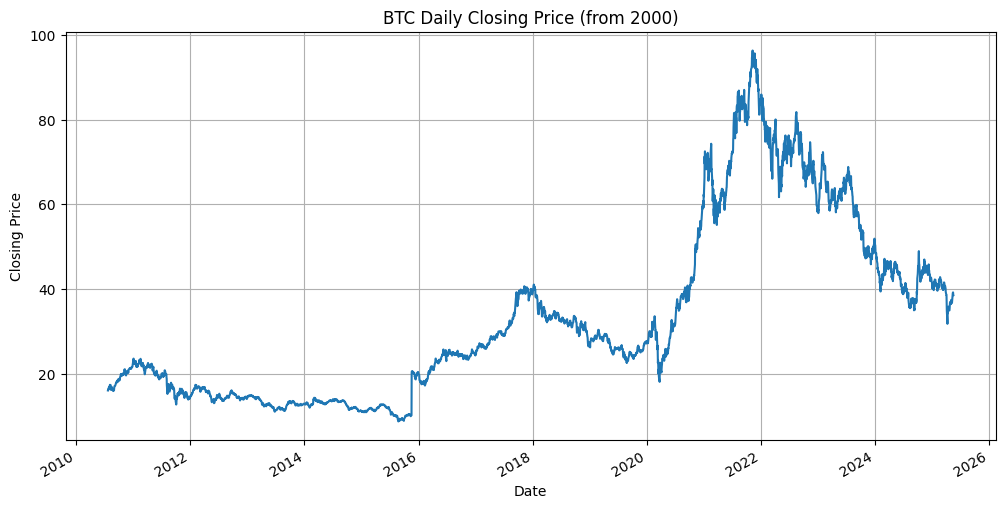

In [8]:


# Step 2: Import libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Define your API key and symbol
api_key = 'PH8UF085L5T5MFZN'
symbol = 'LIT'  # S&P 500 Index

# Step 4: Fetch the data using Alpha Vantage API
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# Step 5: Filter data from 2000 onwards
data.index = pd.to_datetime(data.index)
data = data[data.index >= '2010-01-01']

# Step 6: Display and plot the data
print(data.head())
data['4. close'].plot(figsize=(12, 6), title='BTC Daily Closing Price (from 2000)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [9]:
# Ensure the column names are correct
data.columns = ['open', 'high', 'low', 'close', 'volume']

In [10]:
# ================= TREND INDICATORS =================
stockdata.ta.sma(length=100, append=True)               # Simple Moving Average (SMA) - Average price over a period
stockdata.ta.ema(length=20, append=True)               # Exponential Moving Average (EMA) - Weighted average favoring recent prices
stockdata.ta.wma(length=20, append=True)               # Weighted Moving Average (WMA) - Linear weights on recent prices
stockdata.ta.hma(length=20, append=True)               # Hull Moving Average (HMA) - Reduced lag, smooth trend indicator
stockdata.ta.vwma(length=20, append=True)              # Volume-Weighted Moving Average (VWMA) - Prices weighted by volume
stockdata.ta.macd(fast=12, slow=26, signal=9, append=True)  # Moving Average Convergence Divergence (MACD) - Trend momentum (MACD, MACDh, MACDs)
stockdata.ta.adx(length=14, append=True)               # Average Directional Index (ADX) - Trend strength (ADX, +DI, -DI)
stockdata.ta.cci(length=20, append=True)               # Commodity Channel Index (CCI) - Overbought/oversold levels
stockdata.ta.rsi(length=14, append=True)               # Relative Strength Index (RSI) - Momentum oscillator (0-100)
stockdata.ta.stoch(k=14, d=3, append=True)             # Stochastic Oscillator (STOCH) - Price momentum (K%, D%)
stockdata.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)  # Ichimoku Cloud - Support/resistance, trend, momentum (5 columns)
stockdata.ta.supertrend(length=7, multiplier=3, append=True)  # SuperTrend - Trend direction with ATR volatility (SUPERT, SUPERTd)
stockdata.ta.psar(step=0.02, max_step=0.2, append=True)  # Parabolic SAR (PSAR) - Trailing stop for trends

# ================= MOMENTUM INDICATORS =================
stockdata.ta.mom(length=50, append=True)               # Momentum (MOM) - Price change over period
stockdata.ta.roc(length=10, append=True)               # Rate of Change (ROC) - Percentage price change
stockdata.ta.willr(length=14, append=True)             # Williams %R (WILLR) - Overbought/oversold levels (-0 to -100)
stockdata.ta.uo(append=True)                           # Ultimate Oscillator (UO) - Multi-timeframe momentum
stockdata.ta.ao(fast=5, slow=34, append=True)          # Awesome Oscillator (AO) - Momentum based on 34/5 EMAs
stockdata.ta.kama(length=10, append=True)              # Kaufman's Adaptive MA (KAMA) - Volatility-adjusted moving average
stockdata.ta.cg(length=10, append=True)                # Center of Gravity (CG) - Price cycle indicator

# ================= VOLATILITY INDICATORS =================
stockdata.ta.bbands(length=20, std=2, append=True)     # Bollinger Bands (BBANDS) - Volatility bands (BB_U, BB_M, BB_L)
stockdata.ta.atr(length=14, append=True)               # Average True Range (ATR) - Volatility measure
stockdata.ta.kc(length=20, scalar=2, append=True)      # Keltner Channel (KC) - Volatility bands with ATR (KC_U, KC_M, KC_L)
stockdata.ta.donchian(lower_length=20, upper_length=20, append=True)  # Donchian Channel (DONCHIAN) - Price range channels
stockdata.ta.rvi(length=14, append=True)               # Relative Volatility Index (RVI) - Standard deviation-based oscillator

# ================= VOLUME INDICATORS =================
stockdata.ta.obv(append=True)                          # On-Balance Volume (OBV) - Cumulative volume flow
stockdata.ta.cmf(length=20, append=True)               # Chaikin Money Flow (CMF) - Volume-weighted money flow
stockdata.ta.adosc(fast=3, slow=10, append=True)       # AD Oscillator (ADOSC) - Accumulation/Distribution line oscillator
stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI
stockdata.ta.vwap(append=True)                         # Volume-Weighted Avg Price (VWAP) - Intraday benchmark price
stockdata.ta.eom(length=14, append=True)               # Ease of Movement (EOM) - Price/volume relationship
stockdata.ta.nvi(length=255, append=True)              # Negative Volume Index (NVI) - Smart money indicator

# ================= OTHER INDICATORS =================
stockdata.ta.squeeze(append=True)                      # TTM Squeeze (SQZ) - Bollinger vs Keltner volatility
stockdata.ta.fisher(length=9, append=True)             # Fisher Transform (FISHER) - Normalize prices to Gaussian
stockdata.ta.decay(length=5, mode="linear", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
stockdata.ta.decay(length=5, mode="exponential", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
stockdata.ta.vortex(length=14, append=True)            # Vortex Indicator (VTX) - Trend reversal detection
stockdata.ta.zscore(length=20, append=True)            # Z-Score (ZSCORE) - Standard deviations from mean
stockdata.ta.entropy(length=10, append=True)           # Entropy (ENTROPY) - Measure of market randomness

NameError: name 'stockdata' is not defined

after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

In [ ]:
pd.set_option('display.max_columns', None)
stockdata


,open,high,low,close,volume,SMA_100,EMA_20,WMA_20,HMA_20,VWMA_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,CCI_20_0.015,RSI_14,STOCHk_14_3_3,STOCHd_14_3_3,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,MOM_50,ROC_10,WILLR_14,UO_7_14_28,AO_5_34,KAMA_10_2_30,CG_10,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,KCLe_20_2.0,KCBe_20_2.0,KCUe_20_2.0,DCL_20_20,DCM_20_20,DCU_20_20,RVI_14,OBV,CMF_20,ADOSC_3_10,MFI_14,VWAP_D,EOM_14_100000000,NVI_255,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,FISHERT_9_1,FISHERTs_9_1,LDECAY_5,VTXP_14,VTXM_14,ZS_20,ENTP_10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-05-16,38.48,38.6000,38.3000,38.580,143462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.01,0.000000,1,NaN,NaN,NaN,NaN,0.02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143462.0,NaN,NaN,NaN,38.493333,NaN,3796.692632,NaN,0,0,1,NaN,NaN,38.580,NaN,NaN,NaN,NaN
2025-05-15,38.82,38.9662,38.4700,38.740,128908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.82,NaN,1,NaN,NaN,15.679900,NaN,0.04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272370.0,NaN,NaN,NaN,38.725400,NaN,3796.692632,NaN,0,0,1,NaN,NaN,38.740,NaN,NaN,NaN,NaN
2025-05-14,39.29,39.5500,39.1600,39.240,120114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.81,NaN,1,NaN,NaN,16.611352,NaN,0.06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392484.0,NaN,NaN,NaN,39.316667,NaN,3796.692632,NaN,0,0,1,NaN,NaN,39.240,NaN,NaN,NaN,NaN
2025-05-13,38.85,39.2800,38.8500,39.190,164627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.92,NaN,1,NaN,NaN,17.987671,NaN,0.06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227857.0,NaN,NaN,NaN,39.106667,NaN,3796.692632,NaN,0,0,1,NaN,NaN,39.190,NaN,NaN,NaN,NaN
2025-05-12,38.80,39.2600,38.8000,39.010,229707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.07,NaN,1,NaN,NaN,19.281411,NaN,0.06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1850.0,NaN,NaN,NaN,39.023333,NaN,3796.692632,NaN,0,0,1,NaN,NaN,39.010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-29,16.75,16.9300,16.5700,16.820,250800.0,18.880411,16.916799,16.888908,17.253265,16.774012,-0.070124,0.075057,-0.145181,25.145325,21.256482,29.155281,9.626755,46.484655,51.942740,59.372870,17.8950,19.150,17.04005,16.63,NaN,16.015239,1,16.015239,NaN,16.424227,NaN,0.04,0,-2.3800,2.874618,-49.693252,53.641863,0.077669,16.719329,-5.505306,15.847704,16.726995,17.606286,10.513441,0.552886,0.424648,16.068336,16.916799,17.765262,15.6300,16.63000,17.63,42.755533,-19990025.0,0.122310,124037.878787,56.066793,16.773333,-39.672951,965.348950,0.480917,0,1,0,0.048185,0.567604,16.820,0.761542,0.794881,0.206189,3.350021
2010-07-28,16.50,16.5000,16.2000,16.330,305300.0,18.831711,16.860913,16.851099,17.120973,16.754778,-0.111564,0.026894,-0.138457,25.175296,19.110211,32.237106,-75.810839,39.023665,37.218814,48.738923,17.6950,19.010,16.91500,16.63,NaN,16.015239,1,16.015239,NaN,NaN,17.630000,0.02,1,-2.3436,-0.121713,-79.754601,48.795503,-0.038596,16.717474,-5.546841,15.906288,16.743095,17.579902,9.995852,0.253172,0.438602,15.975161,16.860913,17.746666,15.9600,16.79500,17.63,36.762590,-20295325.0,0.056977,112091.820937,49.678509,16.343333,-34.003445,965.348950,0.326333,0,1,0,-0.505416,0.048185,16.620,0.728395,0.807068,-0.962313,3.343010
2010-07-27,16.75,16.7500,16.3200,16.390

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


Data for LIT:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    38.48  38.6000   38.30     38.58   143462.0
2025-05-15    38.82  38.9662   38.47     38.74   128908.0
2025-05-14    39.29  39.5500   39.16     39.24   120114.0
2025-05-13    38.85  39.2800   38.85     39.19   164627.0
2025-05-12    38.80  39.2600   38.80     39.01   229707.0


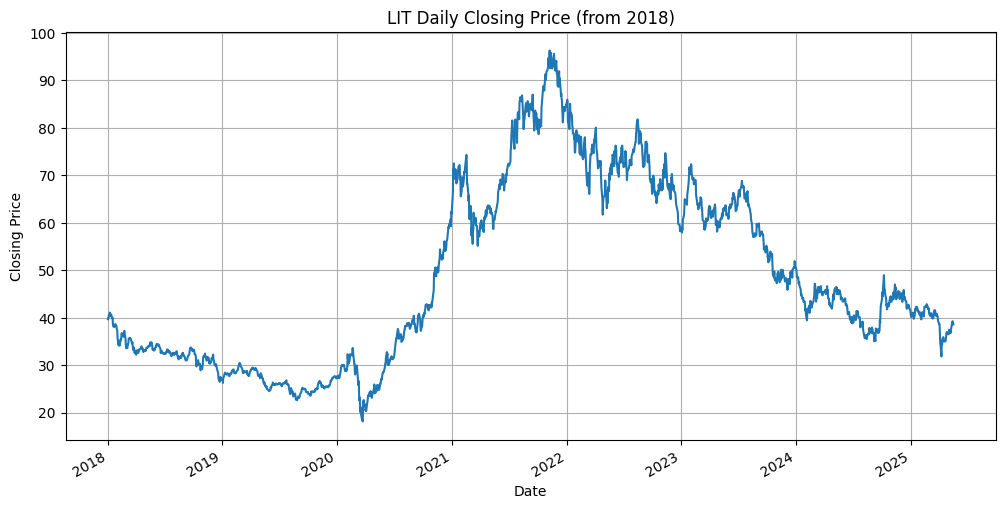

Data for REMX:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    39.41  39.4100  38.9400     39.31   103116.0
2025-05-15    39.65  39.8600  39.1900     39.67   141722.0
2025-05-14    40.08  40.2900  39.6337     39.77   126862.0
2025-05-13    39.86  40.1000  39.6200     39.93    52374.0
2025-05-12    40.10  40.3089  39.5550     39.67   123388.0


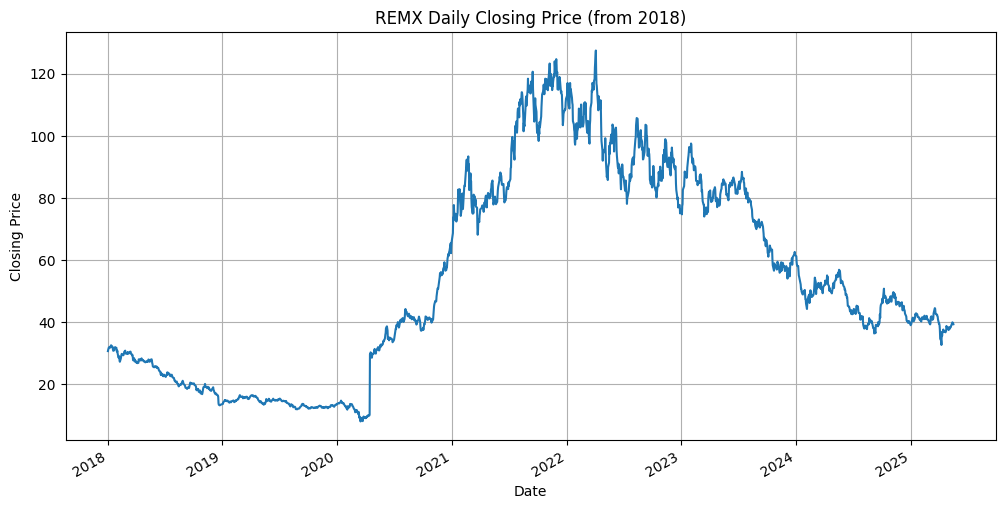

Data for URA:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    28.05   28.160  27.5701     27.71  2220237.0
2025-05-15    27.92   28.090  27.5701     28.01  2131299.0
2025-05-14    27.96   28.305  27.8600     28.15  2212220.0
2025-05-13    27.34   28.000  27.3000     27.84  3082168.0
2025-05-12    27.71   27.820  27.1714     27.29  2211863.0


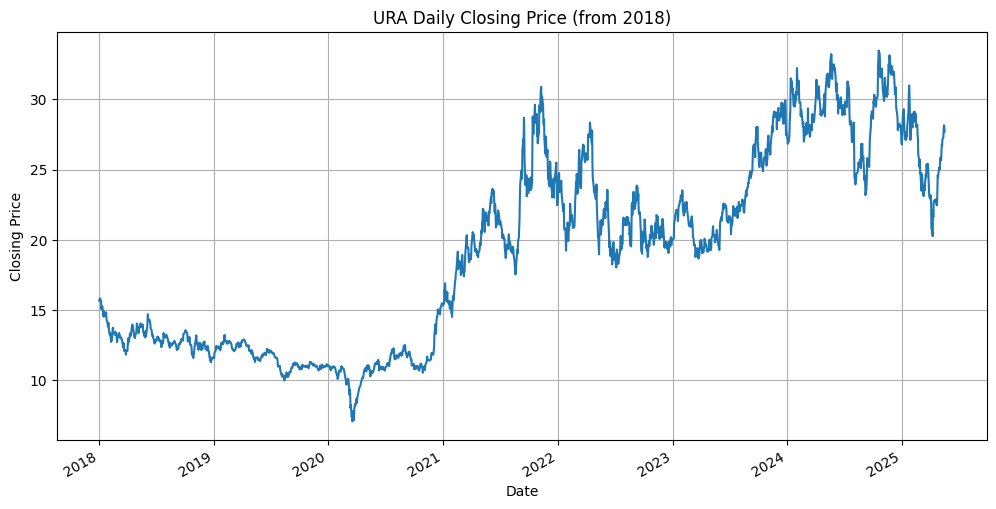

Data for GDX:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   45.410    46.35  45.245     46.33  17271971.0
2025-05-15   46.050    46.60  45.605     46.49  23456736.0
2025-05-14   45.505    45.66  45.100     45.55  26797018.0
2025-05-13   46.720    46.75  46.160     46.54  22356323.0
2025-05-12   48.055    48.08  46.345     46.62  42761575.0


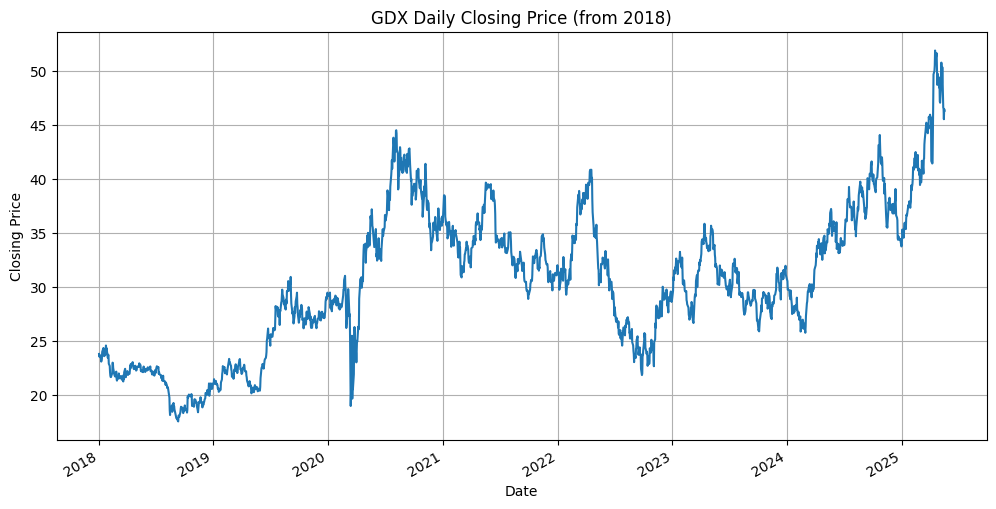

Data for GDXJ:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   57.630    58.71   57.46     58.71   5202932.0
2025-05-15   58.600    59.24   57.84     59.21   5814525.0
2025-05-14   57.975    58.26   57.40     57.88   7900770.0
2025-05-13   59.300    59.72   58.69     59.31   4870081.0
2025-05-12   61.235    61.31   58.91     59.12  12258875.0


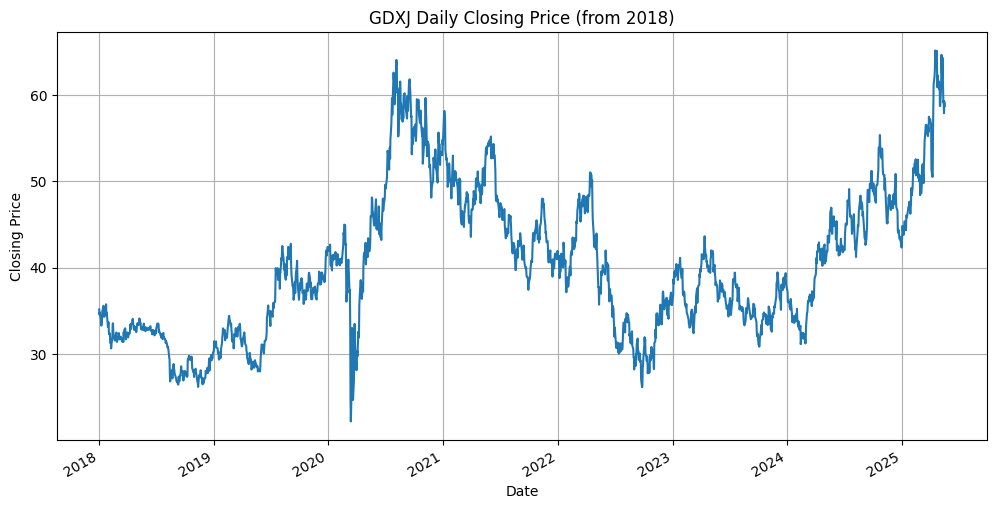

Data for XLE:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   85.800   85.850  84.605     85.48  10862912.0
2025-05-15   84.170   85.660  83.960     85.61  14860766.0
2025-05-14   85.195   85.580  84.920     85.25  10666327.0
2025-05-13   85.000   86.445  84.660     85.77  14515784.0
2025-05-12   85.480   85.870  83.960     84.58  16305028.0


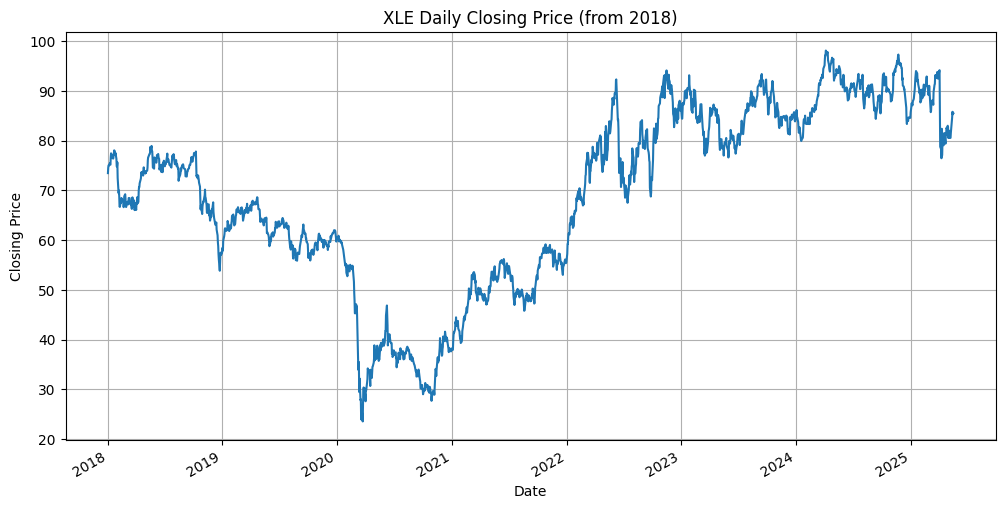

Data for ICLN:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    13.05   13.050  12.8799     12.96  1719319.0
2025-05-15    12.89   13.080  12.8500     13.00  2736296.0
2025-05-14    12.85   12.960  12.8300     12.93  3522216.0
2025-05-13    12.65   12.930  12.6000     12.81  3869482.0
2025-05-12    12.39   12.445  12.2500     12.35  3588033.0


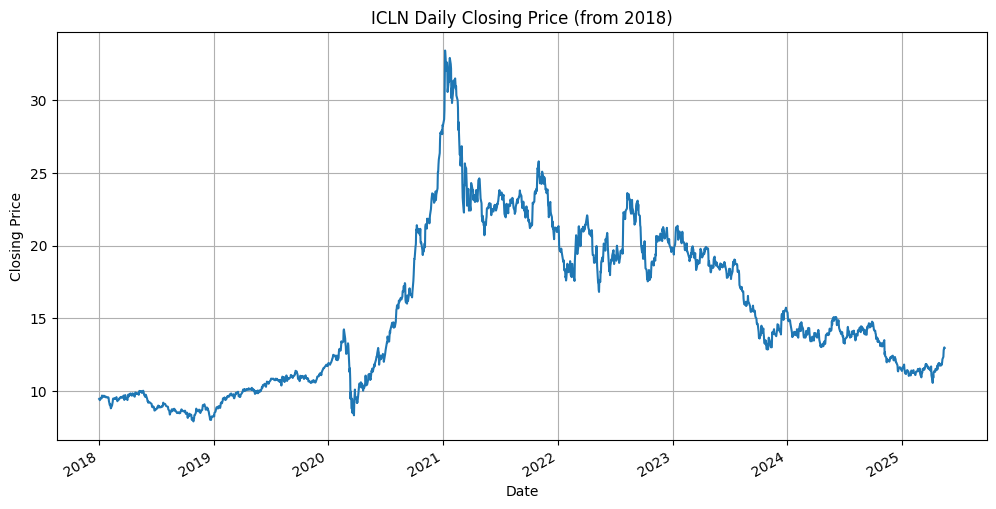

Data for SPY:
            1. open  2. high    3. low  4. close   5. volume
date                                                        
2025-05-16   591.25   594.50  589.2800    594.20  76052101.0
2025-05-15   585.56   590.97  585.0969    590.46  71268145.0
2025-05-14   587.81   588.98  585.5350    587.59  66283531.0
2025-05-13   583.41   589.08  582.8400    586.84  67947225.0
2025-05-12   581.47   583.00  577.0400    582.99  78993570.0


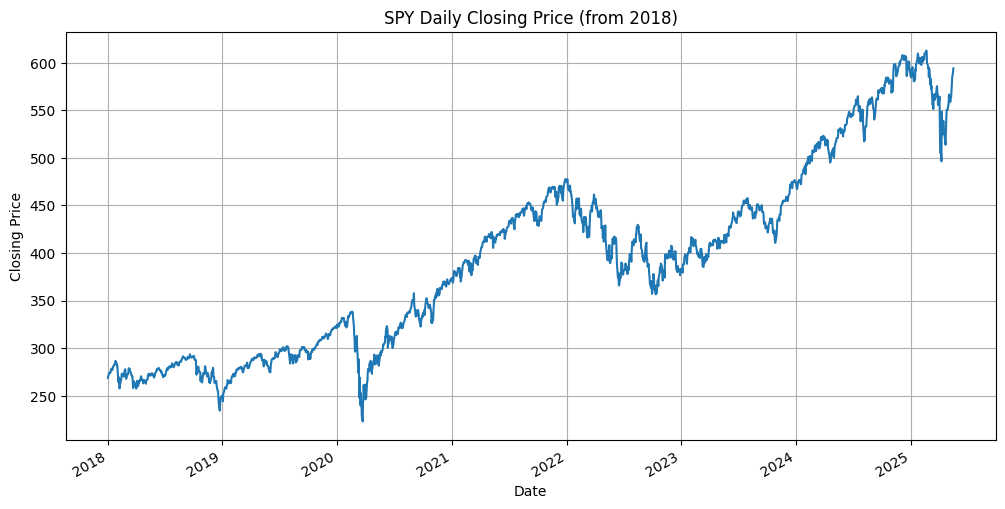

Data for GLD:
            1. open  2. high  3. low  4. close   5. volume
date                                                      
2025-05-16   292.62  294.575  291.78    294.24  14173039.0
2025-05-15   294.10  297.900  293.75    297.84  13497735.0
2025-05-14   293.67  294.800  291.96    293.16  14800596.0
2025-05-13   299.02  300.300  297.24    299.46  10233603.0
2025-05-12   298.33  299.470  296.82    298.19  14375881.0


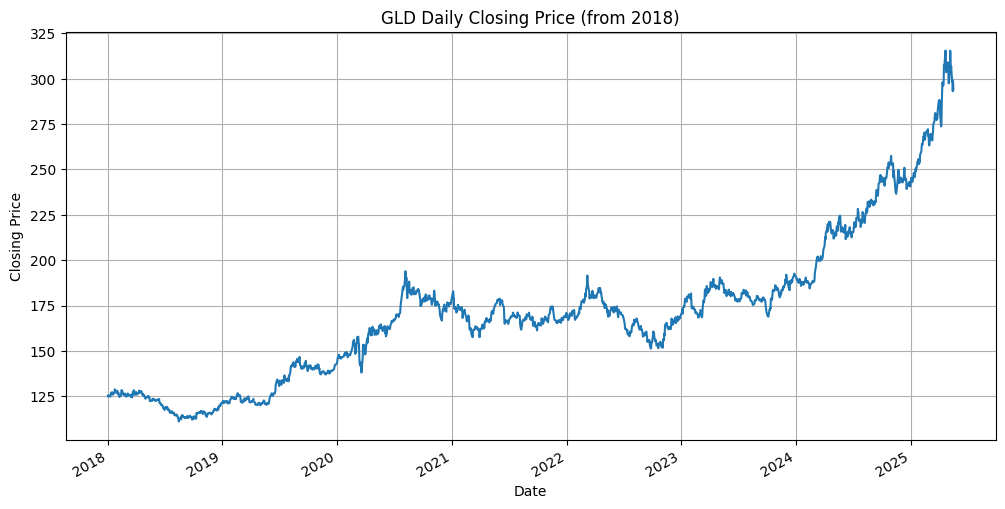

Data for CPER:
            1. open  2. high   3. low  4. close  5. volume
date                                                      
2025-05-16    28.83   28.910  28.5400     28.61   135681.0
2025-05-15    28.90   29.325  28.7994     29.27    95659.0
2025-05-14    29.26   29.260  28.9100     29.00   160079.0
2025-05-13    28.93   29.550  28.9200     29.41   316931.0
2025-05-12    28.96   28.960  28.6500     28.92   134220.0


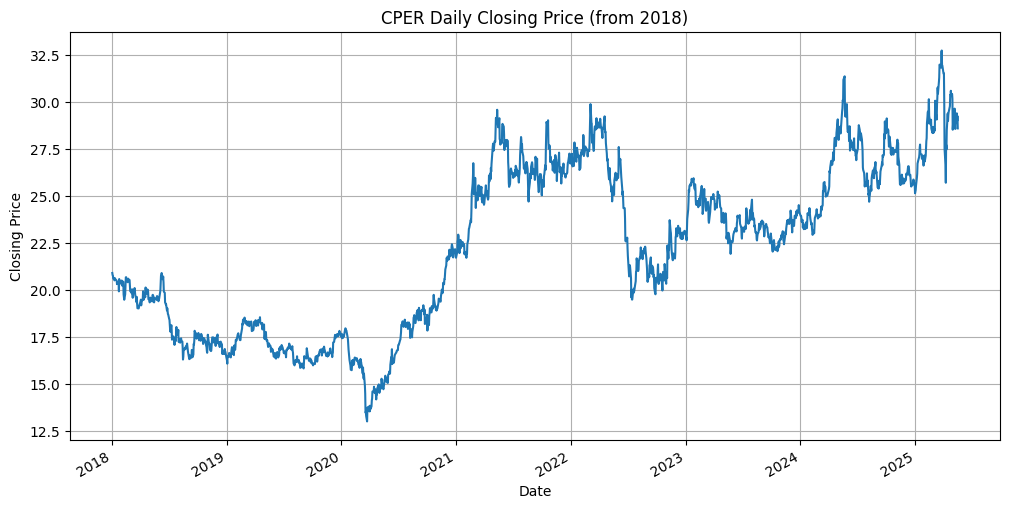

Data for USO:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    67.83    68.54   67.42     68.10  3769410.0
2025-05-15    67.41    67.79   66.87     67.59  5263445.0
2025-05-14    69.28    69.55   68.70     68.73  2802450.0
2025-05-13    68.45    69.88   68.40     69.59  4728018.0
2025-05-12    69.08    69.28   67.48     67.60  4861861.0


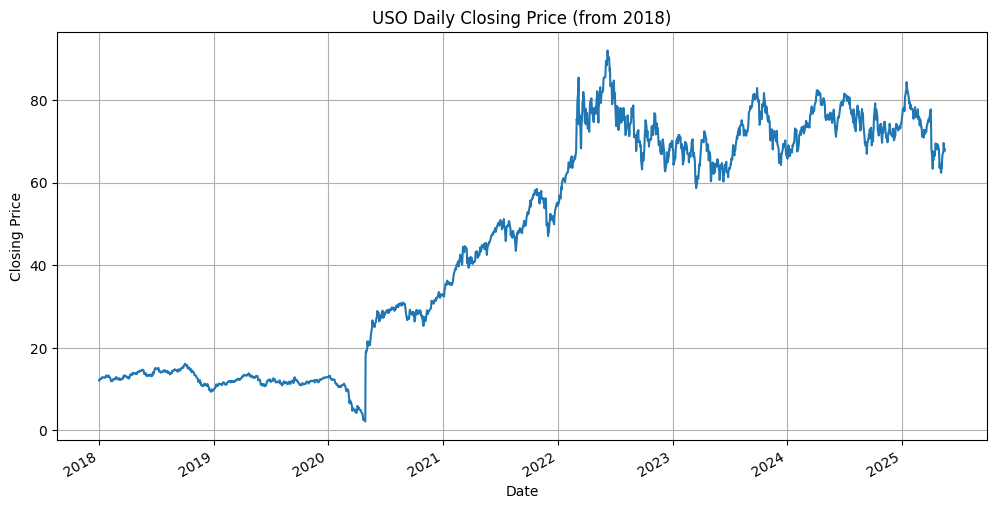

Data for UNG:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-05-16    17.04  17.2685   16.64     16.71  4364129.0
2025-05-15    17.39  17.5100   16.78     16.80  6212183.0
2025-05-14    17.64  17.8400   17.37     17.40  5132737.0
2025-05-13    18.52  18.5400   17.89     18.19  5938706.0
2025-05-12    18.38  18.4500   18.08     18.35  4895153.0


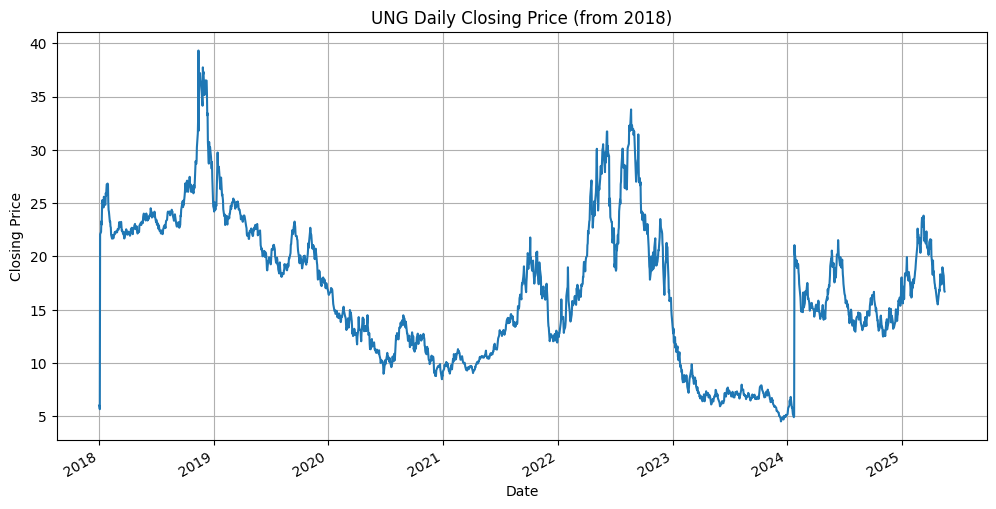

Data for KOL:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2020-12-23    94.92    94.92   94.92     94.92        0.0
2020-12-22    94.92    94.92   94.92     94.92        0.0
2020-12-21    94.92    94.92   94.92     94.92        0.0
2020-12-18    94.92    94.92   94.92     94.92        0.0
2020-12-17    94.92    94.92   94.92     94.92        0.0


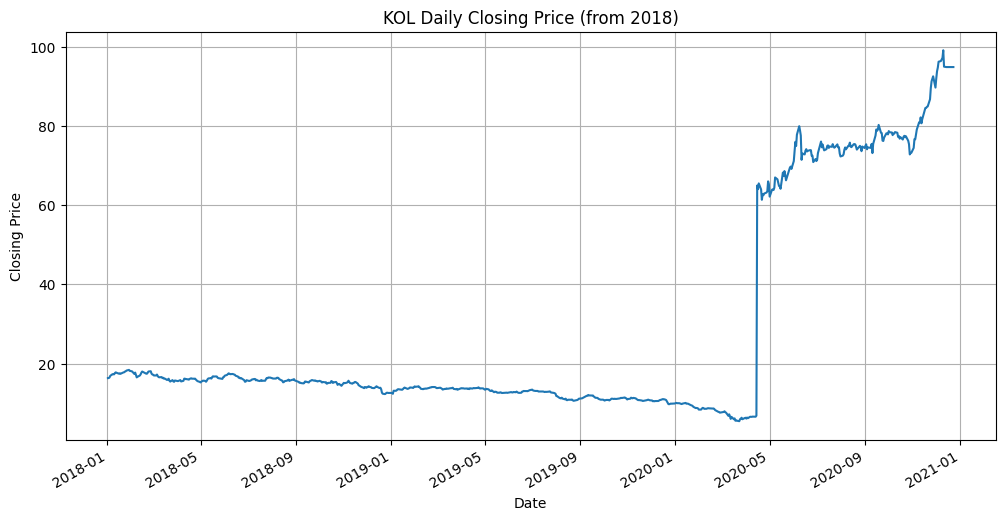

Data for JJN:
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2023-06-14     28.4     28.4    28.4      28.4        0.0
2023-06-13     28.4     28.4    28.4      28.4        0.0
2023-06-12     28.4     28.4    28.4      28.4        0.0
2023-06-09     28.4     28.4    28.4      28.4        0.0
2023-06-08     28.4     28.4    28.4      28.4       83.0


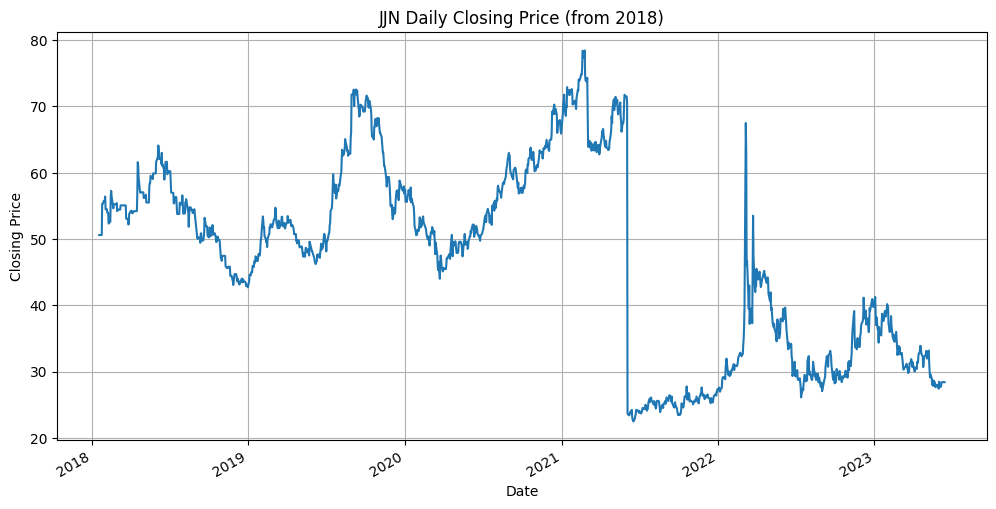

In [11]:
# Step 3: Define your API key and list of symbols
api_key = 'PH8UF085L5T5MFZN'
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

# Step 4: Fetch the data for each symbol using Alpha Vantage API
ts = TimeSeries(key=api_key, output_format='pandas')
all_data = {}
for symbol in symbols:
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    # Filter data from 2018 onwards
    data.index = pd.to_datetime(data.index)
    data = data[data.index >= '2018-01-01']
    all_data[symbol] = data
    print(f"Data for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset
    # Plot the data
    data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

In [ ]:
#filling on NaN's, but is in SPARK,so want to remove


# def fill_nan_with_rolling_median(df, window_size=21): # Use an odd window size to center
#     if window_size % 2 == 0:
#         window_size += 1
#     if window_size < 3:
#         window_size = 3

#     center_offset = (window_size - 1) // 2
#     df_filled = df.apply(lambda col: col.fillna(col.rolling(window=window_size, center=True).median()))


#     df_filled = df_filled.fillna(df_filled.median())

#     return df_filled

# train_data_filled = fill_nan_with_rolling_median(train_data.copy(), window_size=21)
# test_data_filled = fill_nan_with_rolling_median(test_data.copy(), window_size=21)

# print("NaN counts in train_data_filled after rolling median imputation:")
# print(train_data_filled.isnull().sum())

# print("\nNaN counts in test_data_filled after rolling median imputation:")
# print(test_data_filled.isnull().sum())

# # Now you can save these filled dataframes to CSVs and load them into PySpark
# train_data_filled.to_csv("train_filled.csv", index=True)
# test_data_filled.to_csv("test_filled.csv", index=True)

# # Load filled data from CSV into PySpark DataFrame
# train_spark_df = spark.read.csv("train_filled.csv", header=True, inferSchema=True)
# test_spark_df = spark.read.csv("test_filled.csv", header=True, inferSchema=True)

# # Show schema to verify data types
# train_spark_df.printSchema()
# test_spark_df.printSchema()

# # Show first few rows
# train_spark_df.show(5)
# test_spark_df.show(5)

NaN counts in train_data_filled after rolling median imputation:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64

NaN counts in test_data_filled after rolling median imputation:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64
root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- SMA_100: double (nullable = true)
 |-- EMA_20: double (nullable = true)
 |-- WMA_20: double (nullable = true)
 |-- HMA_20: double (nullable = true)
 

move from SKLEARN to pysparkML